In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
%matplotlib inline

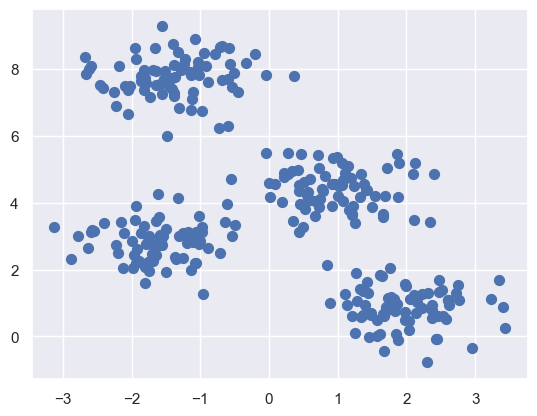

In [2]:
from sklearn.datasets import make_blobs
x,y_true=make_blobs(n_samples=300,centers=4,cluster_std=0.60,random_state=0) # Creating test data with 4 clusters and 300 sample data
plt.scatter(x[:,0],x[:,1],s=50);

In [3]:
from sklearn.cluster import KMeans
kmeans=KMeans(n_clusters=4)# n_clusters = K = 4
kmeans.fit(x)# Training the model i.e., passing the data into the graph
y_kmeans=kmeans.predict(x) # Assigns the clusters names for identification and assign clusters for each value

In [4]:
y_kmeans# 4 clusters from 0-3

array([1, 2, 3, 2, 1, 1, 0, 3, 2, 2, 0, 2, 3, 2, 1, 3, 3, 1, 0, 0, 1, 1,
       3, 0, 0, 3, 1, 3, 0, 3, 2, 2, 3, 2, 2, 2, 2, 2, 0, 1, 3, 0, 3, 3,
       0, 0, 2, 0, 2, 1, 0, 1, 2, 1, 1, 0, 2, 0, 2, 1, 2, 3, 2, 0, 0, 0,
       2, 1, 2, 0, 3, 0, 2, 0, 0, 2, 0, 3, 1, 2, 1, 3, 1, 1, 2, 3, 1, 3,
       2, 2, 3, 1, 2, 0, 0, 3, 1, 1, 3, 0, 2, 1, 2, 1, 3, 1, 1, 3, 2, 3,
       0, 0, 1, 2, 1, 3, 2, 1, 1, 3, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 2, 0,
       0, 1, 2, 0, 0, 2, 3, 2, 2, 0, 3, 0, 3, 0, 2, 3, 2, 2, 2, 3, 2, 3,
       1, 0, 2, 0, 1, 3, 2, 3, 3, 1, 3, 0, 0, 3, 1, 3, 3, 2, 1, 3, 0, 2,
       1, 1, 3, 0, 1, 3, 0, 0, 3, 3, 3, 3, 1, 2, 3, 0, 3, 3, 0, 0, 0, 3,
       0, 2, 3, 0, 1, 0, 3, 2, 0, 2, 3, 2, 3, 0, 3, 3, 2, 0, 0, 1, 1, 3,
       2, 1, 1, 0, 1, 0, 3, 2, 2, 3, 3, 2, 3, 1, 0, 3, 1, 0, 2, 0, 1, 3,
       1, 2, 2, 2, 2, 0, 0, 2, 3, 0, 1, 3, 0, 0, 0, 1, 1, 2, 3, 3, 0, 1,
       2, 0, 3, 2, 3, 1, 1, 0, 0, 3, 1, 1, 1, 3, 2, 2, 1, 1, 3, 1, 1, 1,
       2, 0, 2, 3, 1, 1, 2, 2, 2, 1, 1, 3, 2, 0])

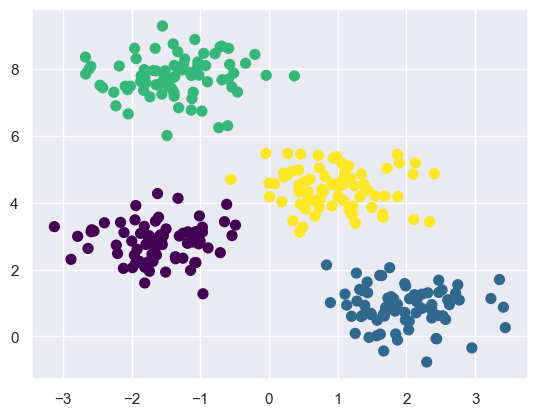

In [5]:
# implementations of kmeans
from sklearn.metrics import pairwise_distances_argmin
def find_clusters(x,n_clusters,rseed=2):
    rng=np.random.RandomState(rseed)
    i=rng.permutation(x.shape[0])[:n_clusters]
    centers=x[i]# randomly assigning centroids calling them centers
    
    
    while True:
        labels=pairwise_distances_argmin(x,centers)# Finds the centroid which is closes to the point for each point i.e., assigning a centroid for each point based on the shortest distance centroid
        
#         calculating the new centroid i.e., changing the location of the centroid to the center 
        new_centers=np.array([x[labels==i].mean(0)
                             for i in range(n_clusters)])

#     If the position of the new centroids are as same as before then convergence occurs and we have our final centroids with their respective clusters
        if(np.all(centers==new_centers)):# Some time the centroids will keep changing but the change will be minimal i.e., by 0.00001 
            break
        centers=new_centers
    return centers,labels

# Calling the above function
centers,labels=find_clusters(x,4);
# Plotting the clusters with different colors
plt.scatter(x[:,0],x[:,1],c=y_kmeans,s=50,cmap='viridis')

In [14]:
from sklearn.datasets import load_sample_image
china = load_sample_image("/output.png")
ax = plt.axes(xticks=[], yticks=[])
ax.imshow(china);

AttributeError: Cannot find sample image: /output.png